Importing the modules

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

using pandas to create a Dataframe for CSV file

In [47]:
df = pd.read_csv("StudentPerformanceFactors.csv")
print(df.head())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [48]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

Gender Distrubution in Data

<function matplotlib.pyplot.show(close=None, block=None)>

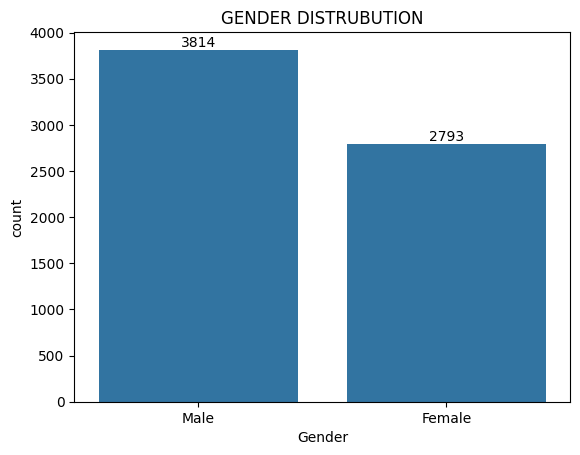

In [63]:
nx = sns.countplot(data=df, x="Gender")
nx.bar_label(nx.containers[0])
plt.title("GENDER DISTRUBUTION")
plt.show

Male gender is 38% more than the Female

<function matplotlib.pyplot.show(close=None, block=None)>

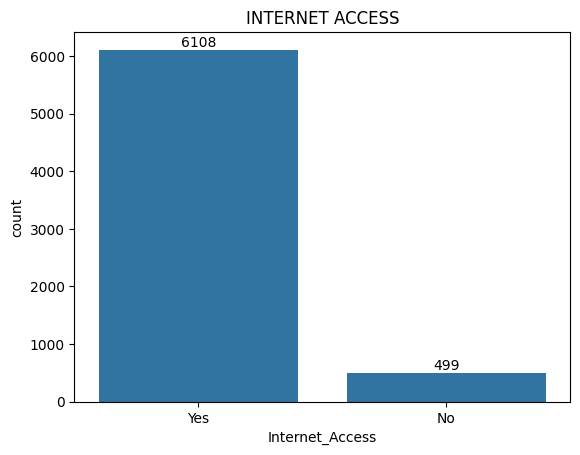

In [64]:
ax = sns.countplot(data=df,x="Internet_Access")
ax.bar_label(ax.containers[0])
plt.title("INTERNET ACCESS")
plt.show

FROM THE ABOVE DATA WE CAN GET TO AN IDEA MOST OF THE STUDENTS HAVE INTERNET ACCESS

<function matplotlib.pyplot.show(close=None, block=None)>

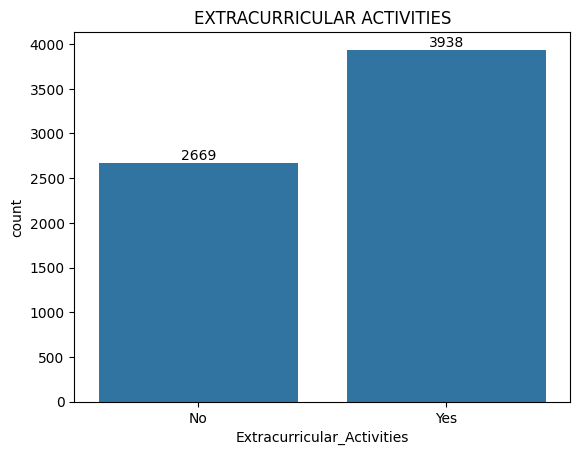

In [65]:
bx = sns.countplot(data=df,x="Extracurricular_Activities")
bx.bar_label(bx.containers[0])
plt.title("EXTRACURRICULAR ACTIVITIES")
plt.show

THE DIFFERENCE IS ALMOST THE 40% Not having extra cricular Activity

In [53]:
gb = df.groupby("Parental_Education_Level").agg({"Hours_Studied":"mean","Attendance":"mean","Exam_Score":"mean"})
print(gb)

                          Hours_Studied  Attendance  Exam_Score
Parental_Education_Level                                       
College                       19.847662   79.966315   67.315737
High School                   20.039715   79.736891   66.893577
Postgraduate                  19.963985   80.572414   67.970881


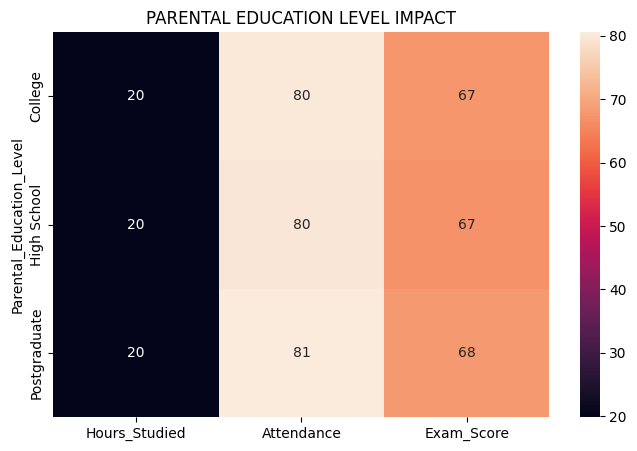

In [66]:
plt.figure(figsize=(8,5))
sns.heatmap(data=gb, annot=True)
plt.title("PARENTAL EDUCATION LEVEL IMPACT")
plt.show()

From the above Data there is no significant impact of Parental_Education_Level in Student Performance

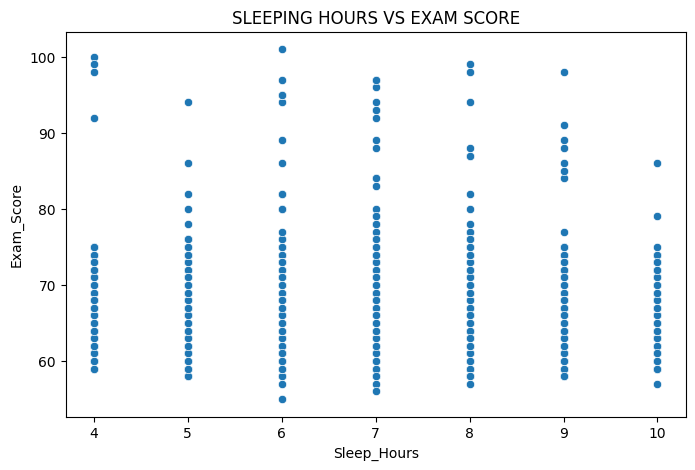

In [73]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Sleep_Hours",y="Exam_Score")
plt.title("SLEEPING HOURS VS EXAM SCORE")
plt.show()

BASED ON THE ABOVE DATA THE STUDENTS SCORES DOESN'T GET EFFECTED SIGNIFICANTLY DUE TO SLEEPING HOURS

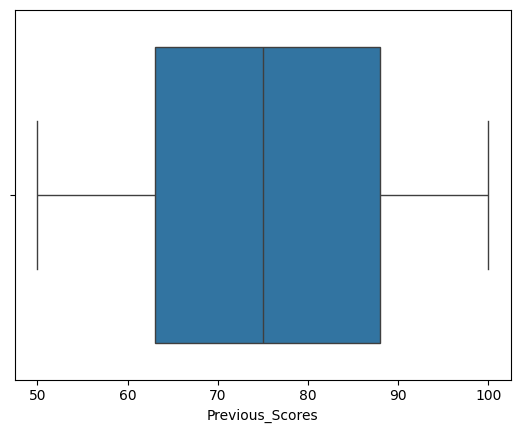

In [75]:
sns.boxplot(data=df,x="Previous_Scores")
plt.show()

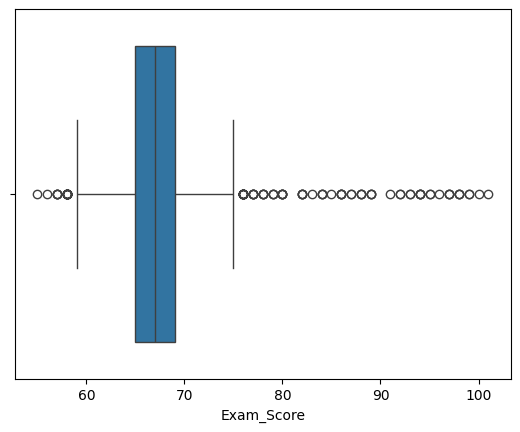

In [74]:
sns.boxplot(data=df,x="Exam_Score")
plt.show()

BASED ON CHART THERE ARE MORE OUTLIERS IN THE SCORES ABOVE THE MAXIMUM

In [80]:
print(df["Motivation_Level"].unique())

['Low' 'Medium' 'High']


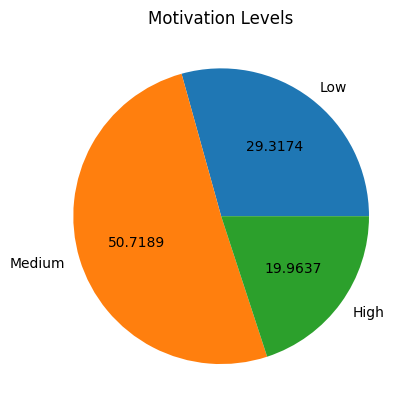

In [90]:
low = df.loc[(df["Motivation_Level"] == "Low")].count()
medium = df.loc[(df["Motivation_Level"] == "Medium")].count()
high = df.loc[(df["Motivation_Level"] == "High")].count()
mlist=[low["Motivation_Level"],medium["Motivation_Level"],high["Motivation_Level"]]
l=["Low","Medium","High"]
plt.title("Motivation Levels")
plt.pie(mlist,labels=l,autopct='%.4f')
plt.show()

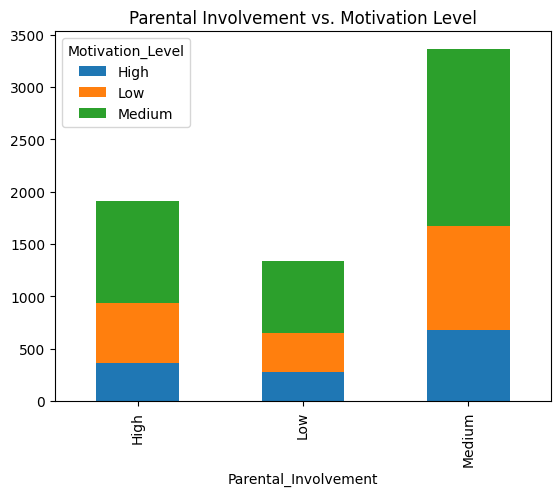

In [96]:
pd.crosstab(df['Parental_Involvement'], df['Motivation_Level']).plot(kind='bar', stacked=True)
plt.title('Parental Involvement vs. Motivation Level')
plt.show()

In [ ]:
MEDIUM ParentalInvolvement shows High number of motivated students disturbuted more in medium movtivated and moderate in Low and significant in High movtivated

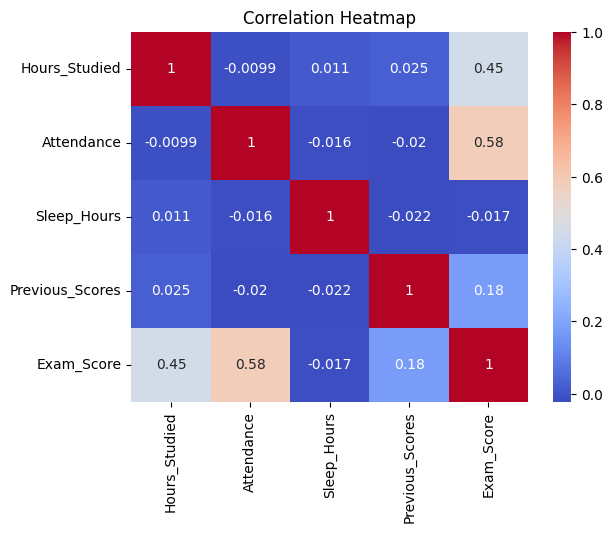

In [92]:
sns.heatmap(df[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Exam_Score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

FROM THE ABOE CORRELATION HEATMAP WE CAN UNDERSTAND THE DIFFERENT LEVELS OF CORRELATION BETWEEN THE MULTIPLE FACTORS

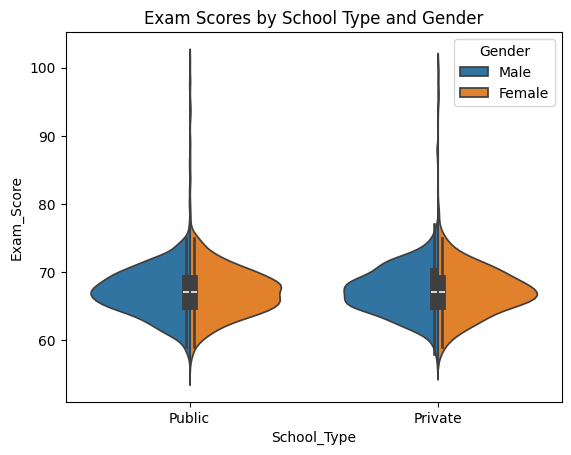

In [95]:
sns.violinplot(data=df, x='School_Type', y='Exam_Score', hue='Gender', split=True)
plt.title('Exam Scores by School Type and Gender')
plt.show()


BASED ON THE PLOT THERE IS NO SIGNIFICANT DIFFERENCE IN THE TYPE OF SCHOOL IF WE CONSIDER FOR THE AVG RANGE OF MARKS

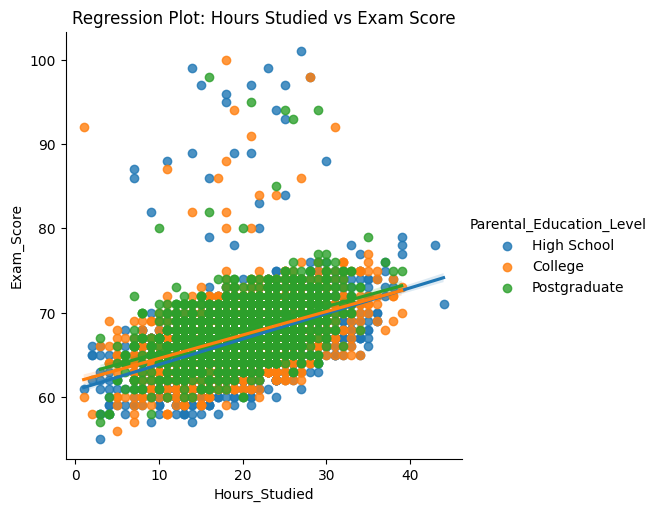

In [98]:
sns.lmplot(data=df, x='Hours_Studied', y='Exam_Score', hue='Parental_Education_Level')
plt.title('Regression Plot: Hours Studied vs Exam Score')
plt.show()

Students with Parents education level of Postgraduate are more in numder with avg Hours of study and avg marks scored where as Students with parental education level with college are more distrubuted in the range ot 20-40 with avg score of 60-70 Students with parental education level with High school are with more in number of outliers and distrubuted around the 0-20 study hours and 50-70 Exam scores